<a href="https://colab.research.google.com/github/smptbot142-lab/NM/blob/main/%D0%9B%D0%B0%D0%B1_%D0%A0_10_CH_M_Teylor_%D0%9C%D1%96%D0%BB%D0%B5%D0%B2%D1%81%D1%8C%D0%BA%D0%B8%D0%B9_%D0%B25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Я був присутній на парі

f'(x) = 5*exp(sin(5*x))*cos(5*x)
f''(x) = -25*exp(sin(5*x))*sin(5*x) + 25*exp(sin(5*x))*cos(5*x)**2
f'''(x) = -375*exp(sin(5*x))*sin(5*x)*cos(5*x) + 125*exp(sin(5*x))*cos(5*x)**3 - 125*exp(sin(5*x))*cos(5*x)
f''''(x) = 1875*exp(sin(5*x))*sin(5*x)**2 - 3750*exp(sin(5*x))*sin(5*x)*cos(5*x)**2 + 625*exp(sin(5*x))*sin(5*x) + 625*exp(sin(5*x))*cos(5*x)**4 - 2500*exp(sin(5*x))*cos(5*x)**2
f(0) = 1.00000000000000
T(x) = 12.5*x**2 + 5.0*x + 1.0


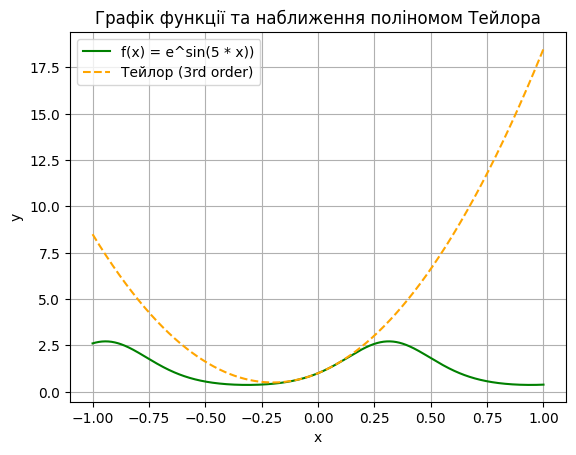

In [3]:
#Лабораторна робота 10. Наближення функцій багаточленом Тейлора.
#Варіант 1
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Задаємо символьну змінну x та функцію f(x)
x = sp.symbols('x')
#f = sp.cos(3*x - 1) + x
f = sp.exp(sp.sin(5 * x))

# Знаходимо перші три похідні
f1 = sp.diff(f, x)
f2 = sp.diff(f1, x)
f3 = sp.diff(f2, x)
f4 = sp.diff(f3, x)

# Виводимо похідні
print("f'(x) =", f1)
print("f''(x) =", f2)
print("f'''(x) =", f3)
print("f''''(x) =", f4)

# Знаходимо значення функції та її похідних в точці x=0
x0 = 0
f_x0 = f.subs(x, x0).evalf()
f1_x0 = f1.subs(x, x0).evalf()
f2_x0 = f2.subs(x, x0).evalf()
f3_x0 = f3.subs(x, x0).evalf()

# Обчислюємо значення полінома Тейлора в точці x=0
T = f_x0 + f1_x0*(x-x0) + (f2_x0/2)*(x-x0)**2 + (f3_x0/6)*(x-x0)**3

# Виводимо значення функції та її наближення за поліномом Тейлора в точці x=0
print("f(0) =", f_x0.round(3))
print("T(x) =",T.evalf())

# Будуємо графіки
x_vals = np.linspace(-1, 1, 1000)
f_vals = np.array([f.subs(x, xi).evalf() for xi in x_vals])
T_vals = np.array([T.subs(x, xi).evalf() for xi in x_vals])

fig, ax = plt.subplots()
ax.plot(x_vals, f_vals, label='f(x) = e^sin(5 * x))', color='green')
ax.plot(x_vals, T_vals, label='Тейлор (3rd order)', color='orange', linestyle='--')
ax.legend()
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Графік функції та наближення поліномом Тейлора")
plt.grid(True)
plt.show()


Перша похідна f'(x): 5*exp(sin(5*x))*cos(5*x)
Друга похідна f''(x): -25*exp(sin(5*x))*sin(5*x) + 25*exp(sin(5*x))*cos(5*x)**2
Третя похідна f'''(x): -375*exp(sin(5*x))*sin(5*x)*cos(5*x) + 125*exp(sin(5*x))*cos(5*x)**3 - 125*exp(sin(5*x))*cos(5*x)
Значення функції в точці x0=0: 1.0


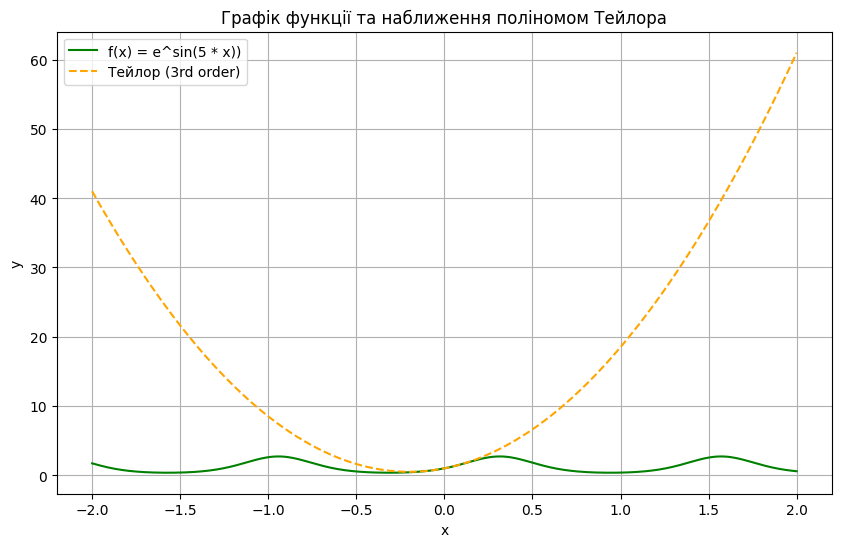

In [7]:
#Варіант 2
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Задаємо символьну змінну x
x_sym = sp.symbols('x')
# Задана функція
f = sp.exp(sp.sin(5 * x_sym))
# Обчислюємо перші три похідні
f_1 = sp.diff(f, x_sym)
f_2 = sp.diff(f_1, x_sym)
f_3 = sp.diff(f_2, x_sym)
# Виводимо похідні
print("Перша похідна f'(x):", f_1)
print("Друга похідна f''(x):", f_2)
print("Третя похідна f'''(x):", f_3)
# Компілюємо функції з SymPy в функції Python
f_func = sp.lambdify(x_sym, f, 'numpy')
f_1_func = sp.lambdify(x_sym, f_1, 'numpy')
f_2_func = sp.lambdify(x_sym, f_2, 'numpy')
f_3_func = sp.lambdify(x_sym, f_3, 'numpy')
# Точка x0
x0 = 0
# Значення функції та многочлена Тейлора в точці x0
f_x0 = f_func(x0)
# Виведення значень
print(f"Значення функції в точці x0={x0}: {f_x0}")
# Діапазон значень x
x = np.linspace(-1, 1, 400)
# Значення функції та поліном Тейлора
f_x = f_func(x)
taylor_x = f_func(0) + f_1_func(0) * x + (f_2_func(0) * x**2) / 2 + (f_3_func(0) * x**3) / 6
# Побудова графіків
plt.figure(figsize=(10, 6))
plt.plot(x, f_x, label='f(x) = e^sin(5 * x))', color='green')
plt.plot(x, taylor_x, label='Тейлор (3rd order)', color='orange', linestyle='--')
plt.legend()
plt.title('Графік функції та наближення поліномом Тейлора')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()


taylor=        15         14         13         12        11         10
186.4 x  + 32.31 x  - 787.2 x  - 185.6 x  + 1345 x  + 428.6 x 
         9         8         7         6         5         4         3
 - 1178 x - 511.9 x + 543.1 x + 329.9 x - 106.7 x - 105.9 x - 9.135 x
          2
 + 13.11 x + 5.22 x + 1


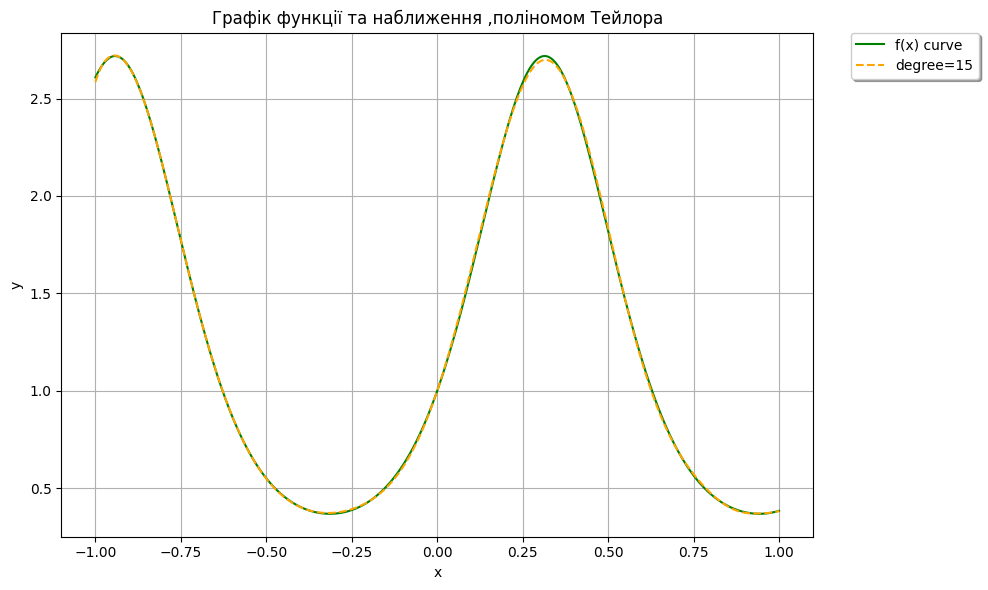

In [12]:
#Побудова полімонома Тейлора за допомогою approximate_taylor_polynomial
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import approximate_taylor_polynomial

# Задана функція
def f(x):
    return np.exp(np.sin(5 * x))
x = np.linspace(-1, 1, num=400)
plt.figure(figsize=(10, 6))
plt.plot(x, f(x), label="f(x) curve", color='green')
degree =15
taylor = approximate_taylor_polynomial(f, 0, degree, 1)
print('taylor=', taylor)
plt.plot(x, taylor(x), label=f"degree={degree}", color='orange', linestyle='--' )
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',borderaxespad=0.0, shadow=True)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Графік функції та наближення ,поліномом Тейлора")
plt.tight_layout()
plt.grid()
plt.show()

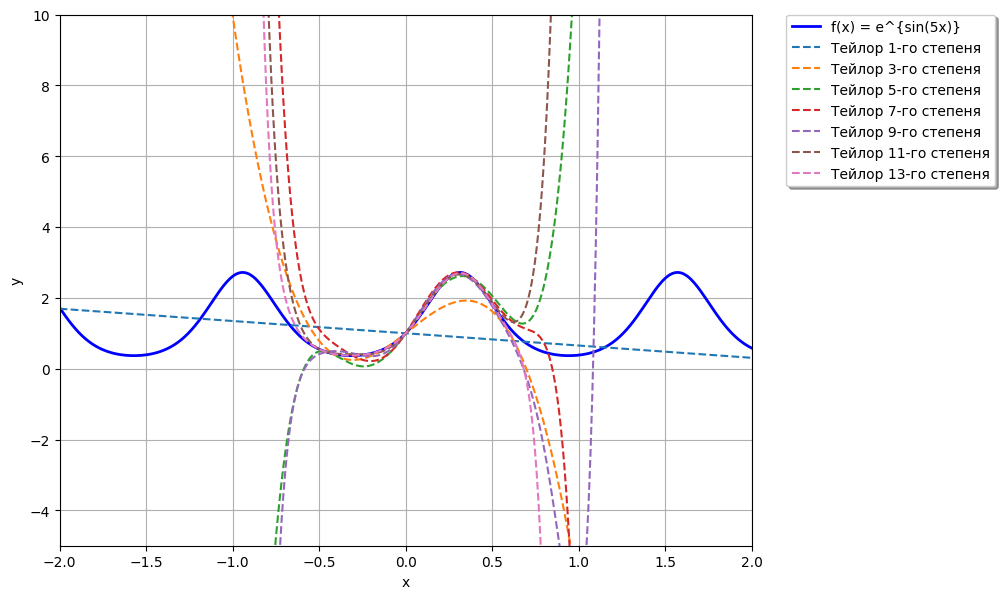

In [23]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import approximate_taylor_polynomial

def f(x):
    return np.exp(np.sin(5 * x))

x = np.linspace(-2.0, 2.0, num=400)

plt.figure(figsize=(10, 6))
plt.plot(x, f(x), label="f(x) = e^{sin(5x)}", color='blue', linewidth=2)

for degree in np.arange(1, 15, step=2):
    f_taylor = approximate_taylor_polynomial(f, 0, degree, 1, order=degree + 2)
    plt.plot(x, f_taylor(x), linestyle='--', label=f"Тейлор {degree}-го степеня")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.0, shadow=True)
plt.tight_layout()
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.axis([-2, 2, -5, 10])
plt.show()
